<a href="https://colab.research.google.com/github/SriSathwik1905/CyberBullying/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
df = pd.read_csv("final_hateXplain.csv")

# Display the first few rows
print(df.head())

                                             comment       label     Race  \
0                     0 u0 lmao wow fuck you too 😂 😂      normal  No_race   
1  1 0 th floor maybe wow cnn with the fakenews t...   offensive  No_race   
2  1 0 yrs <number> white women raped by niggers ...  hatespeech  African   
3  1 2 h ago ching chong accepted your friend req...   offensive    Asian   
4  1 8 th century mayhem and lawlessness had noth...      normal  No_race   

       Religion     Gender Sexual Orientation Miscellaneous  
0  Nonreligious  No_gender     No_orientation           NaN  
1  Nonreligious  No_gender     No_orientation         Other  
2  Nonreligious  No_gender     No_orientation           NaN  
3  Nonreligious  No_gender     No_orientation           NaN  
4  Nonreligious  No_gender     No_orientation           NaN  


In [ ]:
import nltk

# Download the stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Initialize stemmer
stemmer = PorterStemmer()

# Function to preprocess text
def preprocess_text(text):
    # Remove non-alphabetical characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize and remove stopwords
    words = text.split()
    words = [word for word in words if word not in stopwords.words('english')]
    # Apply stemming
    words = [stemmer.stem(word) for word in words]
    return ' '.join(words)

# Apply preprocessing
df['cleaned_comment'] = df['comment'].apply(preprocess_text)

# Display the first few cleaned comments
print(df['cleaned_comment'].head())


0                                      u lmao wow fuck
1    th floor mayb wow cnn fakenew bodi count go wa...
2    yr number white women rape nigger number negre...
3              h ago ching chong accept friend request
4    th centuri mayhem lawless noth loud mouth dona...
Name: cleaned_comment, dtype: object


In [ ]:
# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)
# Fit and transform the cleaned comments
X = tfidf.fit_transform(df['cleaned_comment']).toarray()

# Extract labels
y = df['label']

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Ensure labels are numeric
le = LabelEncoder()
y = le.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression(max_iter=15000)

# Train the model
model.fit(X_train, y_train)

LogisticRegression(max_iter=15000)

Accuracy: 0.63

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.68      0.71      1325
           1       0.60      0.78      0.68      1502
           2       0.55      0.38      0.45      1195

    accuracy                           0.63      4022
   macro avg       0.63      0.62      0.61      4022
weighted avg       0.63      0.63      0.62      4022



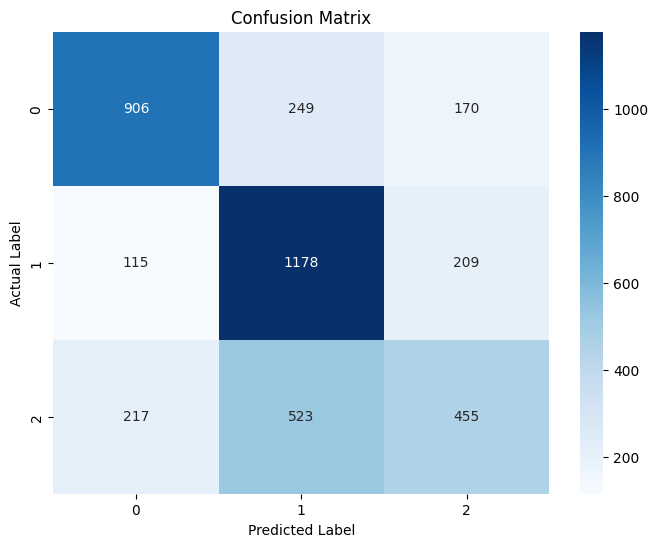

In [ ]:
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


In [ ]:
# Extract feature importance
feature_importance = pd.DataFrame({
    'feature': tfidf.get_feature_names_out(),
    'coefficient': model.coef_[0]
})

# Sort by the absolute value of coefficients
feature_importance['abs_coefficient'] = feature_importance['coefficient'].abs()
feature_importance = feature_importance.sort_values(by='abs_coefficient', ascending=False)

# Display the top 10 important features
print("Top 10 important features for classifying:")
print(feature_importance.head(10))


Top 10 important features for classifying:
       feature  coefficient  abs_coefficient
2449      kike     7.980175         7.980175
3019    nigger     7.371049         7.371049
2932     muzzi     3.977411         3.977411
389     beaner     3.558073         3.558073
964       coon     3.212206         3.212206
2906  mudshark     2.953740         2.953740
4162      spic     2.875915         2.875915
2931    muzrat     2.867574         2.867574
3562   raghead     2.724252         2.724252
3935   sheboon     2.712957         2.712957
